In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


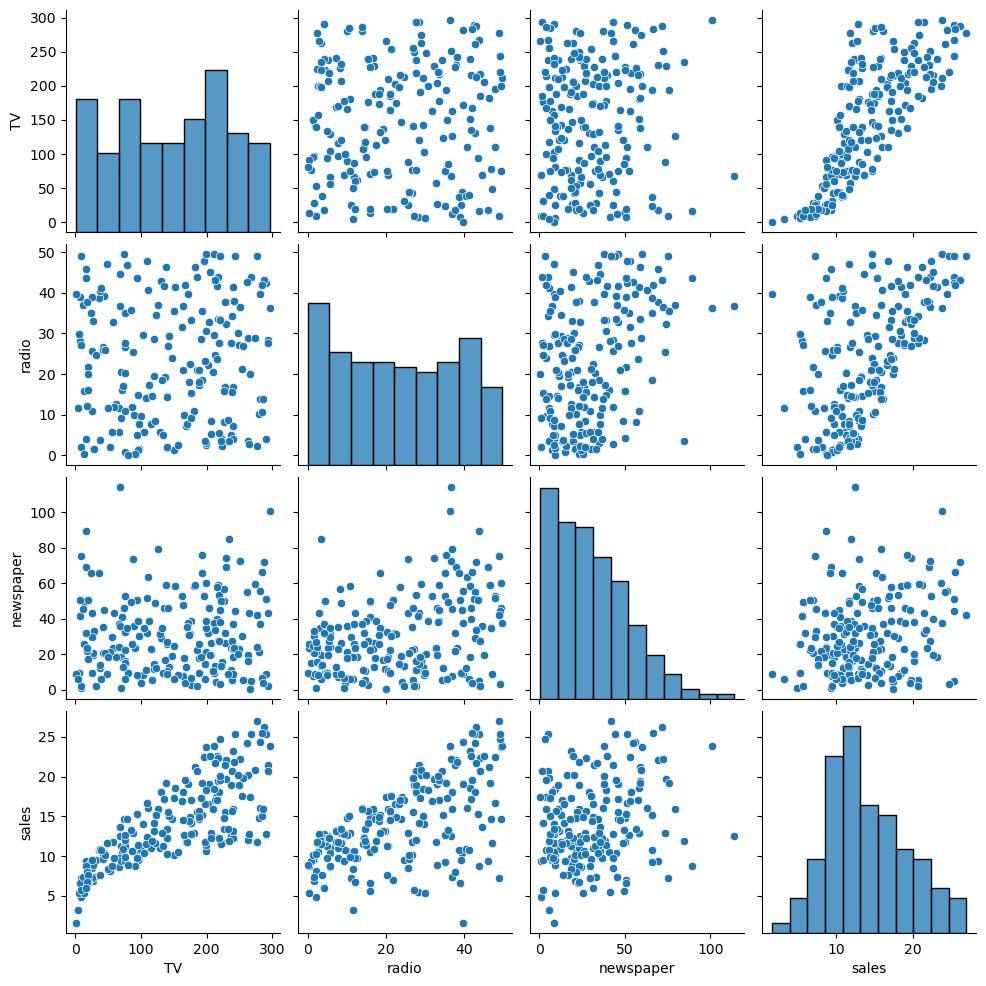

In [7]:
sns.pairplot(df)

In [8]:
X = df.drop('sales' , axis=1)
y = df['sales']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train , y_train)

LinearRegression()

In [16]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [17]:
model.intercept_

3.151526768070653

In [18]:
test_prediction = model.predict(X_test)

In [19]:
test_prediction

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
MAE = mean_absolute_error(y_true=y_test , y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test , y_pred=test_prediction)
RMSE = np.sqrt(MSE)

In [23]:
MAE

1.2137457736144803

In [24]:
MSE

2.2987166978863782

In [25]:
RMSE

1.516151937599388

In [26]:
df['sales'].mean()

14.0225

Text(0, 0.5, 'residuals')

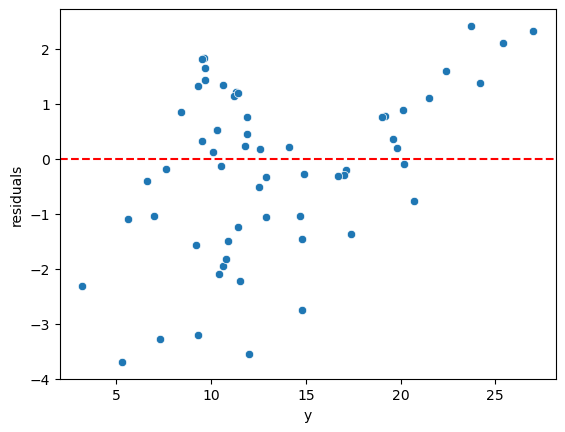

In [29]:
test_res = y_test - test_prediction

sns.scatterplot(x=y , y=test_res)
plt.axhline(y=0 , c='r' , ls='--')
plt.xlabel('y')
plt.ylabel('residuals')

Text(22.694444444444443, 0.5, '')

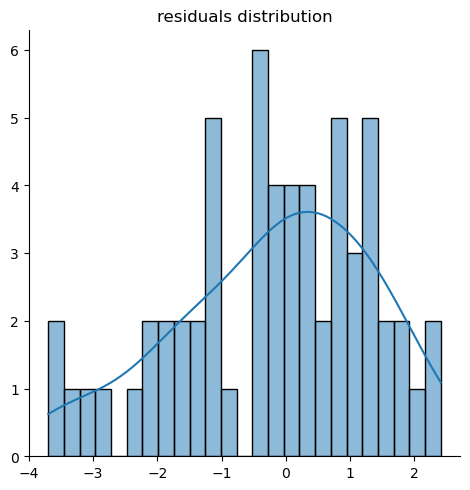

In [37]:
sns.displot(test_res , bins = 25 , kde=True)
plt.title('residuals distribution')
plt.xlabel('')
plt.ylabel('')

In [38]:
import scipy as sp

Text(0, 0.5, '')

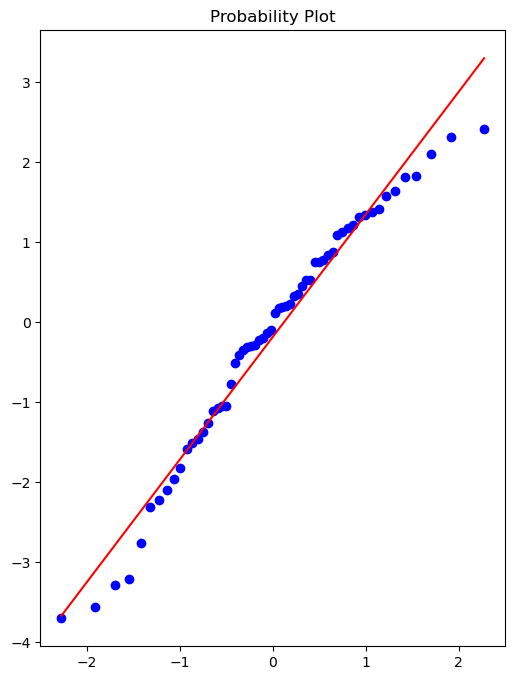

In [42]:
# Q-Q Plot
fig , ax = plt.subplots(figsize=(6,8) , dpi=100)
_ = sp.stats.probplot(x=test_res , plot=ax)
plt.xlabel('')
plt.ylabel('')

In [43]:
#Retrain for all datas

In [44]:
final_model = LinearRegression()

In [46]:
final_model.fit(X,y)

LinearRegression()

In [47]:
final_prediction = final_model.predict(X)

Text(0, 0.5, 'sales')

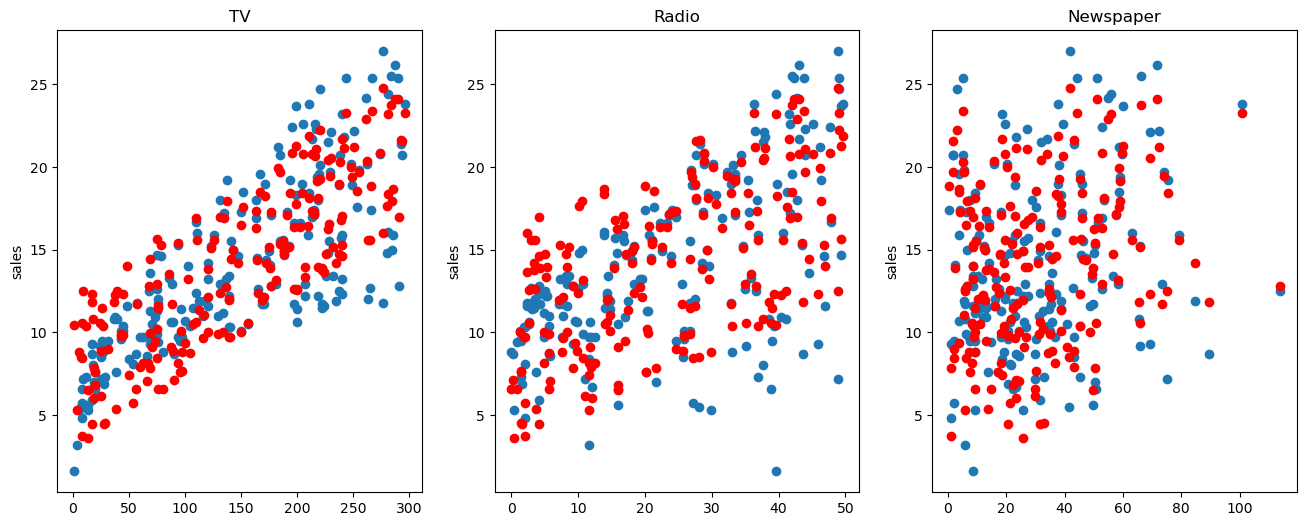

In [55]:
fig , axes = plt.subplots(nrows=1 , ncols=3 , figsize=(16,6))

axes[0].plot(df['TV'] , df['sales'] , 'o')
axes[0].plot(df['TV'] , final_prediction , 'o' , c='r')
axes[0].set_title('TV')
axes[0].set_ylabel('sales')

axes[1].plot(df['radio'] , df['sales'] , 'o')
axes[1].plot(df['radio'] , final_prediction , 'o' , c='r')
axes[1].set_title('Radio')
axes[1].set_ylabel('sales')

axes[2].plot(df['newspaper'] , df['sales'] , 'o')
axes[2].plot(df['newspaper'] , final_prediction , 'o' , c='r')
axes[2].set_title('Newspaper')
axes[2].set_ylabel('sales')

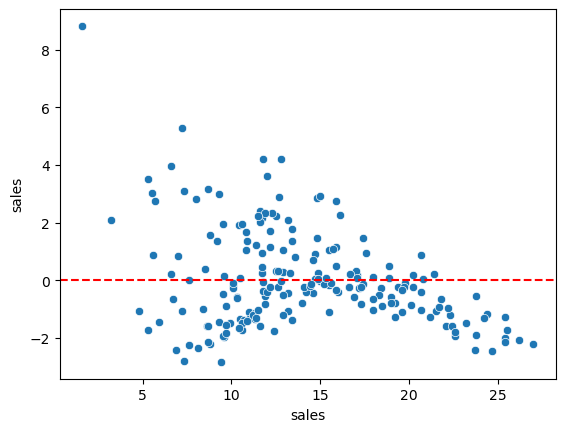

In [57]:
#ALL res
final_residuals = final_prediction - y

sns.scatterplot(x=y , y=final_residuals)
plt.axhline(y=0 , c='r' , ls='--')

In [59]:
#Coefficients

final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [60]:
final_model.intercept_

2.9388893694594067

In [62]:
coeff_df = pd.DataFrame(data=final_model.coef_ , index=X.columns , columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [63]:
#Important: units must be same!!!

#If we invest in one unit of TV, our sales will increase by 0.045765 units. (1000 dollars spend for TV --> 0.045765*1000=45.765 units sales increase)

In [65]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [67]:
# Question:
# We want to spend $149,000 on television, $22,000 on radio, and $12,000 on newspapers for our next advertising campaign
# Based on these, how many units do we expect to sell?

campaign = [[149,22, 12]]

final_model.predict(campaign)

C:\Users\pm513\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [68]:
#Export
from joblib import dump , load

In [69]:
dump(final_model , 'sales_model.joblib')

['sales_model.joblib']

In [71]:
#import
load_model = load('sales_model.joblib')
load_model.predict(campaign)

C:\Users\pm513\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])